In [ ]:
pip install PyPDF2

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mohandas Karamchand (Mahatma) Gandhi, Mahadev H. Desai, Sissela Bok - Gandhi An Autobiography_ The Story of My Experiments With Truth-Beacon Press (1993).pdf to Mohandas Karamchand (Mahatma) Gandhi, Mahadev H. Desai, Sissela Bok - Gandhi An Autobiography_ The Story of My Experiments With Truth-Beacon Press (1993) (4).pdf


In [ ]:
# Importing the book and converting the book content to text format.
import PyPDF2

def pdf_to_text(pdf_file):
    text = ""
    with open(pdf_file, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        for page_num in range(1,len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            text += page.extract_text()
    return text

text = pdf_to_text('Mohandas Karamchand (Mahatma) Gandhi, Mahadev H. Desai, Sissela Bok - Gandhi An Autobiography_ The Story of My Experiments With Truth-Beacon Press (1993).pdf')
text [0:200]

'Chapter 1 \nBIRTH AND PARENTAGE  \nThe Gandhis belong to the Bania caste and seem to have been originally grocers. But for three \ngenerations, from my grandfather, they have been Prime Ministers in seve'

In [ ]:
#Processing the text
#Importing the required libraries
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk

nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
# PreProcessing step 1). Tokenizing the words
nltk.download('punkt')

def preprocess(text):
    # Tokenization
    sentences = nltk.sent_tokenize(text)
    #Converting to Sentences as NER works better on sentence/sequences.
    tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
    return tokenized_sentences

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
sentences = preprocess(text)
sentences[0]

['Chapter',
 '1',
 'BIRTH',
 'AND',
 'PARENTAGE',
 'The',
 'Gandhis',
 'belong',
 'to',
 'the',
 'Bania',
 'caste',
 'and',
 'seem',
 'to',
 'have',
 'been',
 'originally',
 'grocers',
 '.']

In [ ]:
# Converting Data to fit the nltk built in NER algorithm
nltk.download('treebank')
nltk.download('averaged_perceptron_tagger')
from nltk.chunk import conlltags2tree, tree2conlltags
from nltk.corpus import treebank

# def annotate_default(tokenized_sentences):
#     tagged_data = [nltk.pos_tag(sentence) for sentence in tokenized_sentences]
#     return tagged_data

def annotate_data_treebank(tokenized_sentences):
    # Using a treebank corpus of pre-trained set
    tagged_data = treebank.tagged_sents()
    return tagged_data

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
tagged_set = annotate_data_treebank(sentences)
#tagged_set_default = annotate_default(sentences)
tagged_set[0]
#tagged_set_default[0]

[('Pierre', 'NNP'),
 ('Vinken', 'NNP'),
 (',', ','),
 ('61', 'CD'),
 ('years', 'NNS'),
 ('old', 'JJ'),
 (',', ','),
 ('will', 'MD'),
 ('join', 'VB'),
 ('the', 'DT'),
 ('board', 'NN'),
 ('as', 'IN'),
 ('a', 'DT'),
 ('nonexecutive', 'JJ'),
 ('director', 'NN'),
 ('Nov.', 'NNP'),
 ('29', 'CD'),
 ('.', '.')]

In [ ]:
# The algorithm of ne_chunk is a mix of statistical model and premade human models
# Applying ne_chunk
from nltk import ne_chunk

nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
from nltk.chunk import conlltags2tree, tree2conlltags

entities = []
def train_ner_model(tagged_data):
    # Convert the POS tagging to IOB format
    iob_data = [tree2conlltags(ne_chunk(sent, binary=False)) for sent in tagged_data]

    # Extract named entities and their types

    named_entities = []
    for sentence in iob_data:
        for word, _, ne_type in sentence:
            if ne_type != 'O':
              entities.append(word)
              named_entities.append((word, ne_type))

    return named_entities


named_entities = train_ner_model(tagged_set)
len(named_entities)
#print(entities)
#print(named_entities)


[('Pierre', 'B-PERSON'), ('Vinken', 'B-ORGANIZATION'), ('Mr.', 'B-PERSON'), ('Vinken', 'B-PERSON'), ('Elsevier', 'B-ORGANIZATION'), ('Dutch', 'B-GPE'), ('Rudolph', 'B-PERSON'), ('Agnew', 'B-GPE'), ('Consolidated', 'B-ORGANIZATION'), ('Gold', 'I-ORGANIZATION'), ('Fields', 'I-ORGANIZATION'), ('British', 'B-GPE'), ('Kent', 'B-PERSON'), ('Lorillard', 'B-PERSON'), ('Inc.', 'B-ORGANIZATION'), ('New', 'B-GPE'), ('Loews', 'B-PERSON'), ('Micronite', 'B-ORGANIZATION'), ('New', 'B-ORGANIZATION'), ('England', 'I-ORGANIZATION'), ('Journal', 'I-ORGANIZATION'), ('Medicine', 'B-GPE'), ('Lorillard', 'B-ORGANIZATION'), ('Kent', 'B-ORGANIZATION'), ('James', 'B-PERSON'), ('A.', 'I-PERSON'), ('Talcott', 'I-PERSON'), ('Boston', 'B-GPE'), ('Talcott', 'B-PERSON'), ('National', 'B-ORGANIZATION'), ('Cancer', 'I-ORGANIZATION'), ('Institute', 'I-ORGANIZATION'), ('Harvard', 'B-ORGANIZATION'), ('University', 'I-ORGANIZATION'), ('Boston', 'B-ORGANIZATION'), ('University', 'I-ORGANIZATION'), ('Lorillard', 'B-ORGANIZA

In [ ]:

# Making text sets for testing and evaluating
# we'll take 10 paragraphs from across the book and then test our modelled data against the manually tagged data
len(text)
print(len(text))
para1 = text[105375:106450]
para2 = text[217904:218713]
para3 = text[451333:453057]
para4 = text[700204:703734]
para5 = text[827046:828994]
# para6 = text[146840:247775]
# para7 = text[369018:469039]
# para8 = text[581300:682234]
# para9 = text[745621:846621]
# para10 = text[894562: 952066]

named_entities_para1 = [
    ('Society' ,'B-ORGANIZATION'),
    ('England', 'B-GPE')
]

named_entities_para2 = [
    ('Corp.', 'I-ORGANIZATION'),
    ('Germiston', 'B-GPE'),
    ('Abdul', 'I-PERSON'),
    ('Station', 'B-LOCATION'),
    ('Pretoria', 'B-GPE')
]

named_entities_para3 = [
    ('Panda', 'B-PERSON'),
    ('Rupeel', 'B-MONEY'),
    ('Panda', 'B-PERSON'),
    ("Twelve o'clock", 'I-TIME'),
    ('Victor', 'B-PERSON'),
    ('Bombay', 'B-GPE'),
    ('1891', 'B-DATE'),
    ('Borge', 'B-FACILITY'),
    ('Temple', 'B-GPE'),
    ('Speedway', 'B-FACILITY')
]

named_entities_para4 = [
    ('Viramgam', 'I-LOCATION'),
    ('Wadhwan', 'B-LOCATION'),
    ('Express', 'B-ORGANIZATION'),
    ('Motilal', 'B-PERSON'),
    ('Kathiawadis', 'B-GPE'),
    ('Rs.', 'I-MONEY'),
    ('Indianapolis', 'B-FACILITY'),
    ('Doctor', 'B-PERSON'),
]

named_entities_para5 = [
    ('England', 'B-GPE'),
    ('Italy', 'B-GPE'),
    ('Mr.', 'I-PERSON'),
    ('Andrews', 'B-PERSON'),
    ('Lord Chelmsford', 'B-PERSON'),
    ('Mr. Maffey', 'B-PERSON'),
    ('Viceroy', 'B-PERSON'),
    ('British ', 'B-GPE'),
    ('Government', 'B-ORGANIZATION'),
    ('India', 'B-GPE'),
    ('Hindi', 'B-LANGUAGE'),
]



para1

952066


"I do want to  give you a ticket on one condition, however, \nthat, if the guard should ask you to shift to the third class, you will not involve me in the affair, by which I mean that you should not proceed against the Railway Company. I wish you a safe journey. I can see you are a gentleman.' \n \nWith these words he booked the ticket. I thanked him and gave him the necessary assurance.  \nSheth Abdul Gani had come to see me off at  the station. The incident gave him an agreeable \nsurprise, but he warned me saying: 'I shall be thankful if you reach Pretoria all right. I am afraid the guard will not leave you in peace in the first class and even if he does, the passengers will \nnot.'  \nI took my seat in a first class compartment and the train started. At Germiston the guard came to examine the tickets."

In [ ]:
# Now tagging the data based on our model of all the five Paragraphs

para = [para1, para2, para3, para4, para5]
for paragraph in para:
  #print(paragraph)
  entities = []
  p = preprocess(paragraph)
  pa = annotate_data_treebank(p)
  #par = train_ner_model(pa)
  #print(par)

In [ ]:
# Manually tagged data can be stored in an array
# then it can be used to
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the function to evaluate the NER model
def evaluate_model(manual_tags, predicted_tags):
    """
    Evaluate the accuracy of the NER model.

    Parameters:
    - manual_tags: List of manually tagged entities in the format [('word', 'ENTITY'), ...]
    - predicted_tags: List of predicted entities from the NER model in the same format

    Returns:
    - Precision, Recall, F1-score, Accuracy
    """
    # Create dictionaries for easy comparison
    manual_dict = dict(manual_tags)
    predicted_dict = dict(predicted_tags)

    # Extract entities from both dictionaries
    manual_entities = set(manual_dict.keys())
    predicted_entities = set(predicted_dict.keys())

    # Calculating metrics
    common_entities = manual_entities.intersection(predicted_entities)

    #print(f"Common Entities: {common_entities}")
    #print(f"Manual Tags: {[manual_dict[word] for word in common_entities]}")
    #print(f"Predicted Tags: {[predicted_dict[word] for word in common_entities]}")

    # Calculate precision, recall, F1-score, and accuracy
    precision = precision_score([manual_dict[word] for word in common_entities],
                                [predicted_dict[word] for word in common_entities],
                                average='weighted', zero_division=1)
    recall = recall_score([manual_dict[word] for word in common_entities],
                          [predicted_dict[word] for word in common_entities],
                          average='weighted', zero_division=1)
    f1 = f1_score([manual_dict[word] for word in common_entities],
                  [predicted_dict[word] for word in common_entities],
                  average='weighted', zero_division=1)

    # Calculate accuracy
    correct_predictions = sum(1 for word in common_entities if manual_dict[word] == predicted_dict[word])
    total_predictions = len(common_entities)
    accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0

    # Confusion Matrix
    confusion_mat = confusion_matrix([manual_dict[word] for word in common_entities],
                                     [predicted_dict[word] for word in common_entities])

    # Visualizations
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(manual_entities),
                yticklabels=sorted(manual_entities))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Print metrics
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    print(f"Accuracy: {accuracy:.2f}")

    return precision, recall, f1, accuracy
    predicted_tags = named_entities




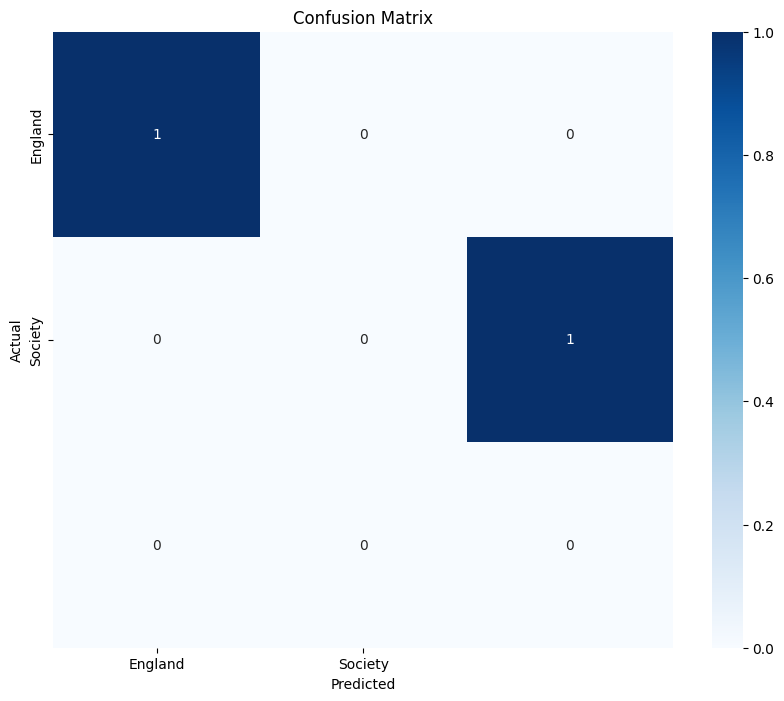

Precision: 1.00
Recall: 0.50
F1-score: 0.50
Accuracy: 0.50


In [ ]:
precision, recall, f1, accuracy = evaluate_model(named_entities_para1, predicted_tags)


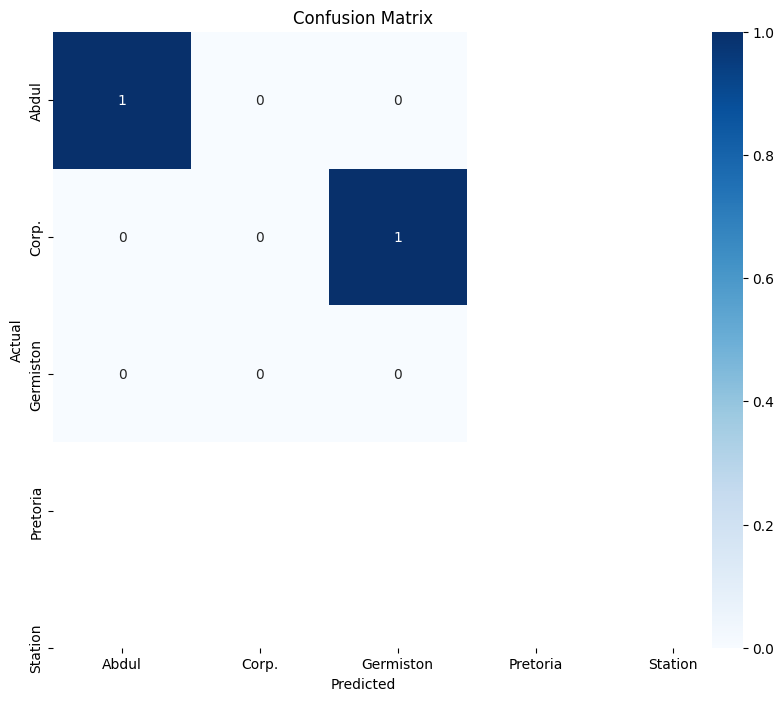

Precision: 1.00
Recall: 0.50
F1-score: 0.50
Accuracy: 0.50


In [ ]:
precision, recall, f1, accuracy= evaluate_model(named_entities_para2, predicted_tags)


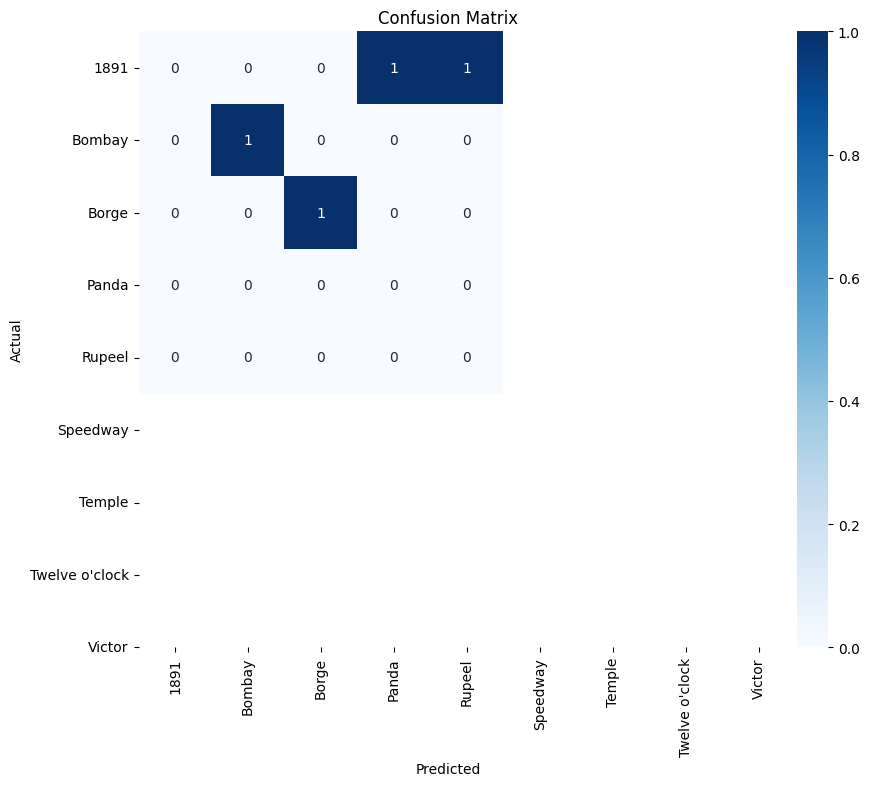

Precision: 1.00
Recall: 0.50
F1-score: 0.50
Accuracy: 0.50


In [ ]:
precision, recall, f1, accuracy = evaluate_model(named_entities_para3, predicted_tags)


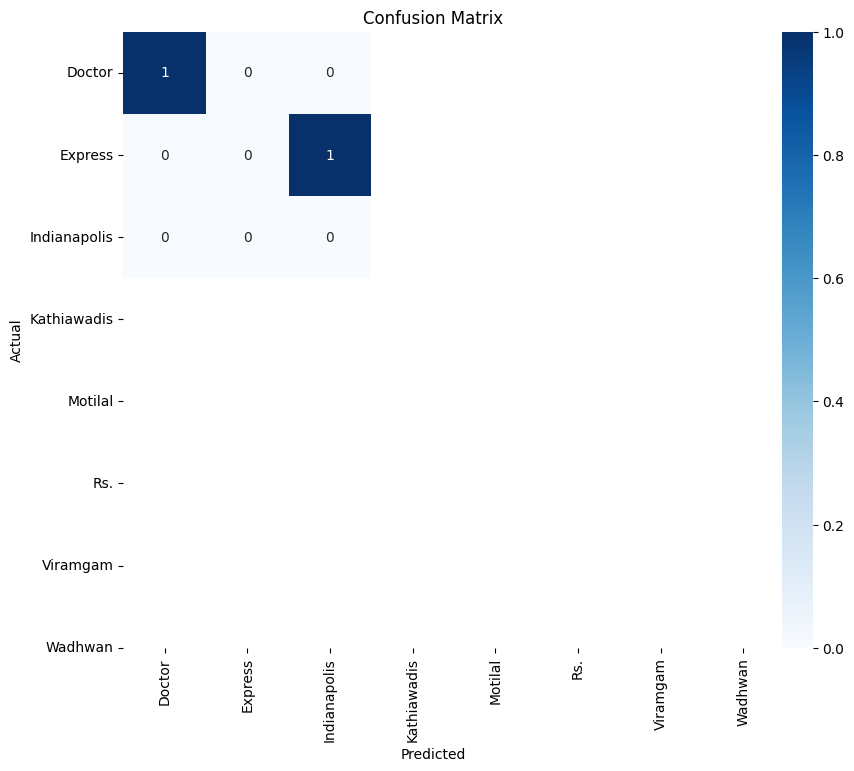

Precision: 1.00
Recall: 0.50
F1-score: 0.50
Accuracy: 0.50


In [ ]:
precision, recall, f1, accuracy = evaluate_model(named_entities_para4, predicted_tags)


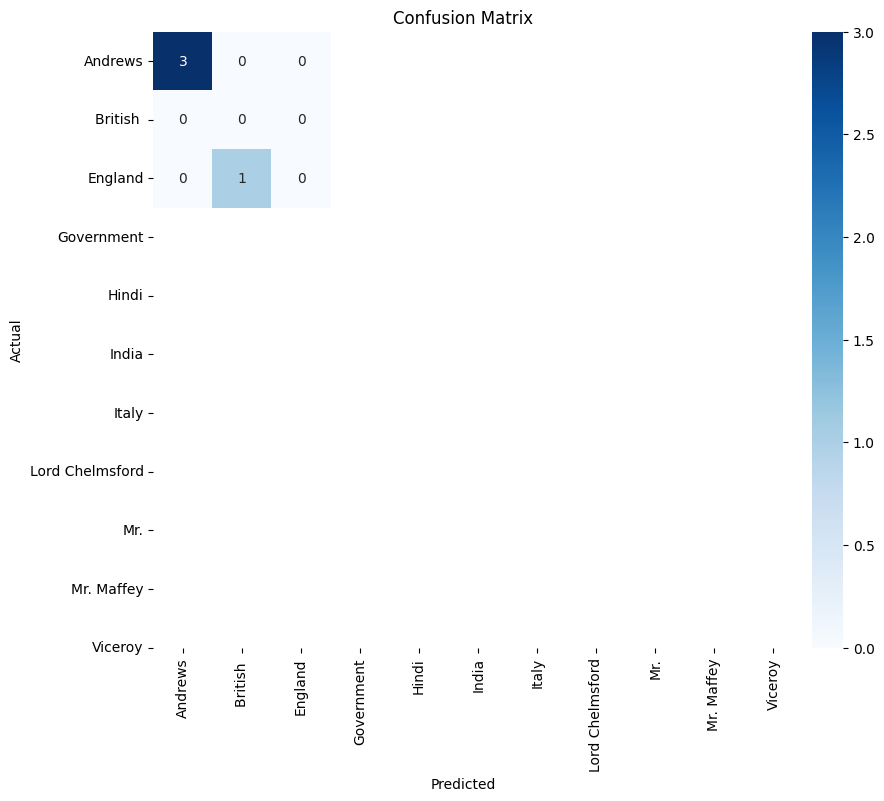

Precision: 1.00
Recall: 0.75
F1-score: 0.75
Accuracy: 0.75


In [ ]:
precision, recall, f1, accuracy = evaluate_model(named_entities_para5, predicted_tags)

In [ ]:
def extract_chapters(text):
    # Initialize variables
    chapters = text.split('Chapter ')[1:]  # Remove the first empty element
    return chapters

In [ ]:
#All the chapters of the book
ch = extract_chapters(text)
ch[1]


"2 \nCHILDHOOD  \nI must have been about seven when my father left Porbandar for Rajkot to become a member of \nthe Rajasthanik Court. There I was put into a primary school, and I can well recollect those days, \nincluding the names and other particulars of the teachers who taught me. As at Porbandar, so \nhere, there is hardly anything to note about my studies. I could only have been a mediocre \nstudent. From this school I went to the s uburban school and thence to the high school, having \nalready reached my twelfth year. I do not remember having ever told a lie, during this short \nperiod, either to my teachers or to my school-mates, I used to be very shy and avoided all \ncompany. My books and my lessons were my sole companions. To be at school at the stroke of \nthe hour and to run back home as soon as the school closed-that was my daily habit. I literally ran \nback, because I could not bear to talk to anybody. I was even afraid lest anyone should poke fun \nat me.  \nThere is a

In [ ]:

!pip install scikit-learn nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# As the book has 170 chapters we take only 20 of the beginning chapters to show the next part of the question
# Where we are vectorizing the chapters and finding similarity between them.
chapters = ch[1:21]
len(chapters)
chapters[1]

"3 \nCHILD MARRIAGE   \nM uch as I wish that I had not to write this chapter, I know that I shall have to swallow many \nsuch bitter draughts in the course of this narrative. And I cannot do otherwise, if I claim to be a worshipper of Truth. It is my painful duty to have to record here my marriage at the age of thirteen. As I see the youngsters of the same age about me who are under my care, and think of \nmy own marriage, I am inclined to pity myself and to congratulate them on having escaped my lot. \nI can see no moral argument in support of such a preposterously early marriage. \n \nLet the reader make no mistake. I was married, not betrothed. For in Kathiawad there are two distinct rites, betrothal and marriage. Betrothal is a preliminary promise on the part of the parents \nof the boy and the girl to join them in marriage, and it is not inviolable. The death of the boy \nentails no widowhood on the girl. It is an agreement purely between the parents, and the children have no conc

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize




In [ ]:
# Step 1: We are doing Basic Text Processing here to get better vectors in general

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

# This is the function for text preprocessing
def preprocess_text(text):
    words = word_tokenize(text)
    words = [ps.stem(word.lower()) for word in words if word.isalnum() and word.lower() not in stop_words]
    return ' '.join(words)

chapters = [preprocess_text(chapter) for chapter in chapters]



In [ ]:
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Transform the preprocessed text data into a TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(chapters)


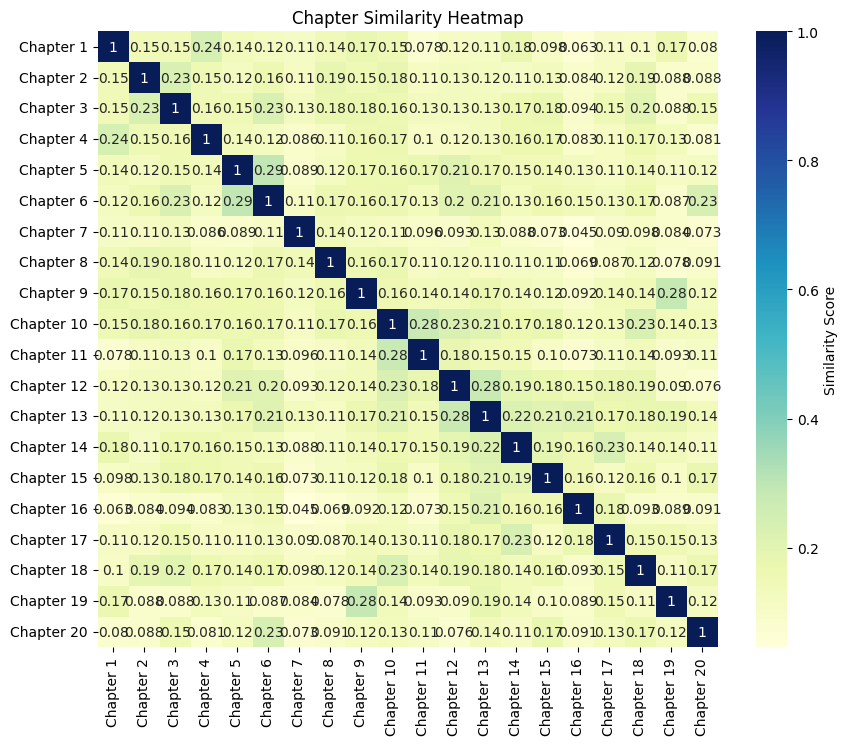

The most similar chapters are Chapter 4 and Chapter 11 with a similarity score of 0.10


In [ ]:
# Calculate cosine similarity between TF-IDF vectors of chapters
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

chapter_names = ["Chapter {}".format(i+1) for i in range(len(chapters[0:20]))]

# Creating a DataFrame for the similarity matrix
df_similarity = pd.DataFrame(similarity_matrix, index=chapter_names, columns=chapter_names)

# Creating a heatmap for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(df_similarity, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Similarity Score'})
plt.title("Chapter Similarity Heatmap")
plt.show()





In [ ]:
# Maximum Similar data for the two chapters
triu_indices = np.triu_indices(similarity_matrix.shape[0], k=1)
max_similarity_index = np.unravel_index(np.argmax(similarity_matrix[triu_indices]), similarity_matrix.shape)

# Extract chapter numbers with maximum similarity
most_similar_chapters = (max_similarity_index[0] + 1, max_similarity_index[1] + 1)

# Output the most similar chapters
print(f"The most similar chapters are Chapter {most_similar_chapters[0]} and Chapter {most_similar_chapters[1]} ")
print(f"A similarity score of {similarity_matrix[max_similarity_index]:.2f}")

The most similar chapters are Chapter 4 and Chapter 11 
A similarity score of 0.10
